# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
train_df.shape

(60000, 785)

In [4]:
test_df.shape

(10000, 785)

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
training = np.array(train_df, dtype = 'float32')
testing = np.array(test_df, dtype='float32')

0.0
15631


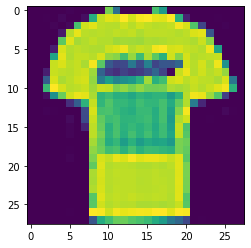

In [8]:
import random
i = random.randint(1,len(training))
plt.imshow(training[i,1:].reshape((28,28)))
label = training[i,0]
print(label)
print(i)
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

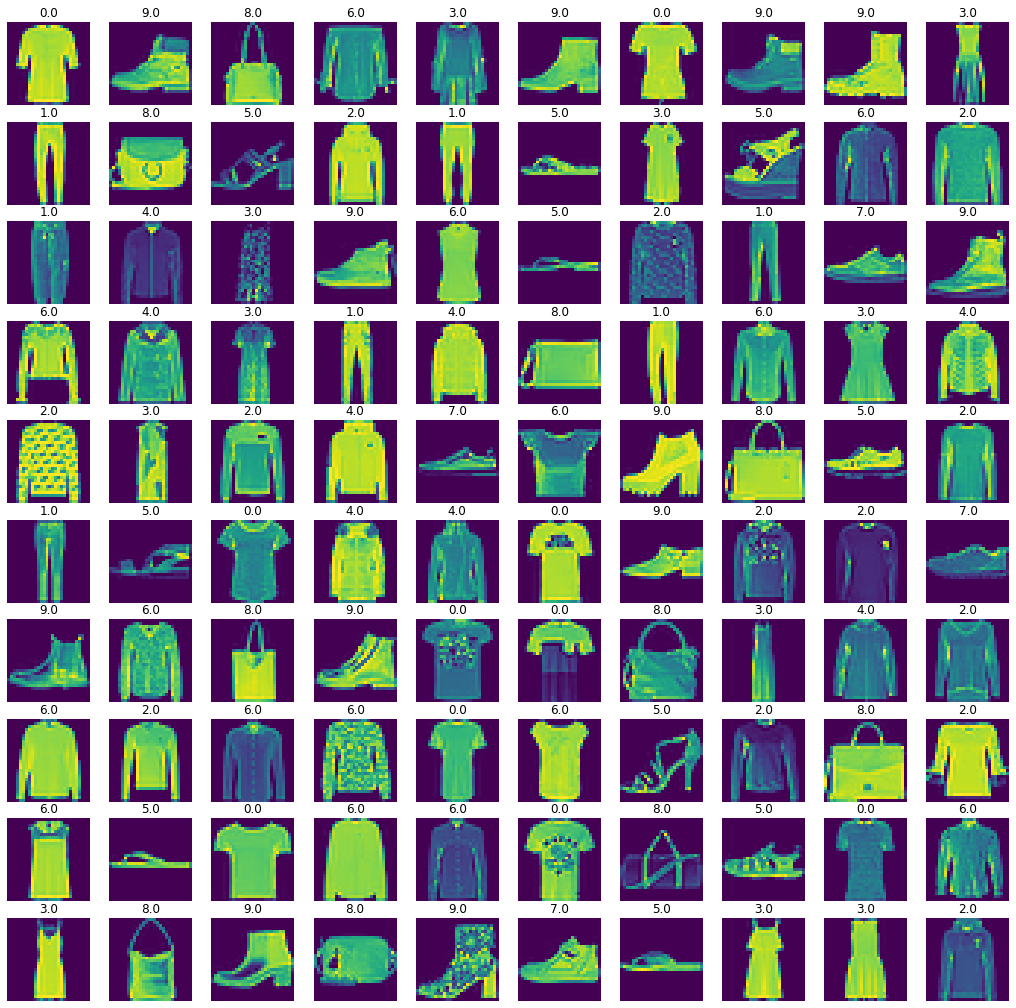

In [9]:
Length = 10
Width = 10

fig, axes = plt.subplots(Length, Width, figsize = (18,18))
axes = axes.ravel() #Flattening to 1D

for i in np.arange(0, Length*Width):
    index = np.random.randint(0, len(training))
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0])
    axes[i].axis('off')

# Training the model

In [10]:
X_train = training[:,1:]/255 #Normalising data
y_train = training[:,0]

X_test = testing[:,1:]/255 #Normalising data
y_test = testing[:,0]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [12]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [13]:
import keras

Using TensorFlow backend.


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [15]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


/Users/LEE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/LEE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  if __name__ == '__main__':
/Users/LEE/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # Remove the CWD from sys.path while we load stuff.


In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [17]:
cnn_model.fit(X_train, y_train, batch_size = 1, epochs = 5)

Epoch 1/5
45000/45000 [==============================] - 238s 5ms/step - loss: 0.4453 - accuracy: 0.8387
Epoch 2/5
45000/45000 [==============================] - 224s 5ms/step - loss: 0.3266 - accuracy: 0.8815
Epoch 3/5
45000/45000 [==============================] - 190s 4ms/step - loss: 0.3027 - accuracy: 0.8912
Epoch 4/5
45000/45000 [==============================] - 195s 4ms/step - loss: 0.2917 - accuracy: 0.8947
Epoch 5/5
45000/45000 [==============================] - 216s 5ms/step - loss: 0.2828 - accuracy: 0.8993


# Model Evaluation

In [18]:
predicted_classes = cnn_model.predict_classes(X_test)

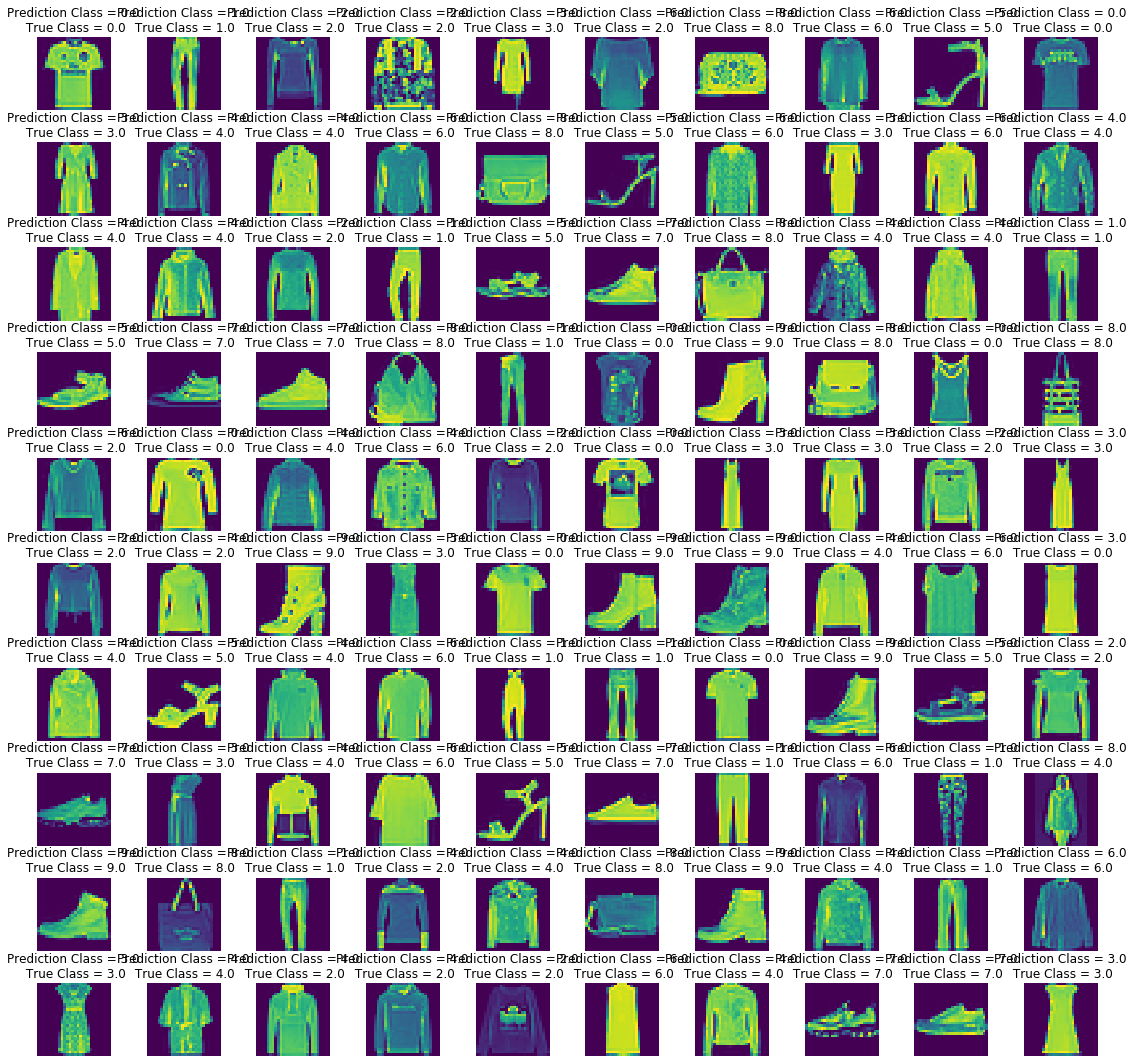

In [19]:
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (19,19))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


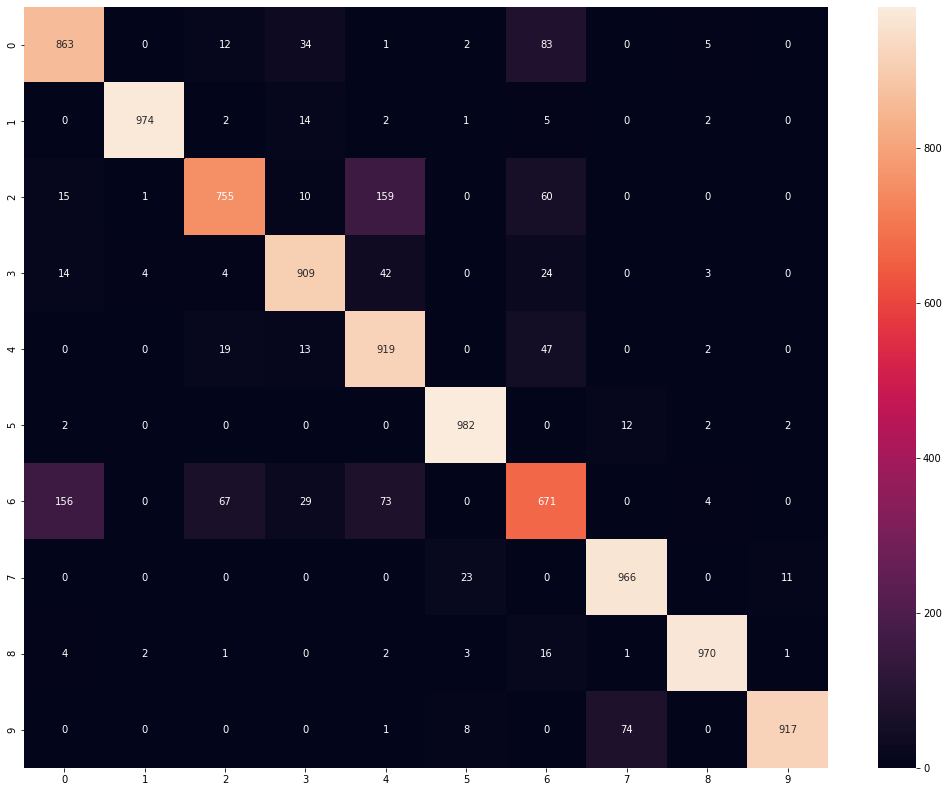

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (18,14))
sns.heatmap(cm, annot=True, fmt = 'g')

In [21]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.86      0.84      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.88      0.76      0.81      1000
     Class 3       0.90      0.91      0.90      1000
     Class 4       0.77      0.92      0.84      1000
     Class 5       0.96      0.98      0.97      1000
     Class 6       0.74      0.67      0.70      1000
     Class 7       0.92      0.97      0.94      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.98      0.92      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

